$$ \textbf{Задание 2} $$
$$ \textbf{Богданов Александр} $$

In [156]:
import numpy as np
from tqdm import tqdm, trange
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

$\textbf{Задача 1 (10 баллов).}$ Пусть есть НОР (i.i.d.) выборка $x_1, \dots, x_n, n > 100$ из нормального распределения со средним $m$ и неизвестной дисперсией $\sigma$. На уровне значимости $\alpha$ проверить гипотезу $H_0$ о том, что $m = 0$. Выписать критическую область и сосчитать мощность критерия $W$ в зависимости от истинных $m$ и $\sigma$.

$\textbf{Решение:}$

Рассмотрим статистику:

$$T(\mathbf{X}) = \frac{\overline{x}}{S / \sqrt{n}},$$

где $\overline{x}$ - выборочное среднее, a $S^2$ - выборочная дисперсия:

$$\overline{x} =  \sum\limits_{i = 0}^n x_i,$$

$$S^2 = \frac{1}{n - 1} \sum\limits_{i = 0}^n (x_i - \overline{x})^2$$

Тогда в предположении истиности гипотезы $H_0$ статистика имеет распределение Стьюдента с $n - 1$ степенью свободы:

$$T(X) \sim t(n - 1)$$

В качестве критической области возьмем: $|T(\mathbf{X})| > r_{\alpha}$, где $r_{\alpha} = t_{1 - \frac{\alpha}{2}}(n - 1) = t_{\frac{\alpha}{2}}(n - 1)$.

Таким образом $H_0$ отвергается $\Leftrightarrow |T_1(\mathbf{X})| > r_{\alpha},\ r_{\alpha} = t_{1 - \frac{\alpha}{2}}(n - 1)$

Представим статистику в зависимости от истиных $m$ и $\sigma$:

$$T(\mathbf{X}) = \frac{\frac{\overline{x} - m}{\sigma / \sqrt{n}} + \frac{m}{\sigma / \sqrt{n}}}{\sqrt{\frac{S^2 (n - 1)}{\sigma^2}\frac{1}{n - 1}}}$$

Так как $\frac{\overline{x} - m}{\sigma / \sqrt{n}} \sim N(0, 1)$, $\frac{m}{\sigma / \sqrt{n}}$ - константа, $\sqrt{\frac{S^2 (n - 1)}{\sigma^2}} \sim \chi^2(n)$, $n - 1$ - константа, то $T(\mathbf{X})$ имеет нецентральное распределение Стьюдента и функцию распределения $F_{n - 1, \frac{m}{\sigma / \sqrt{n}}}(x)$. Тогда мощность:

$$W(m, \sigma) = 1 - F_{n - 1, \frac{m}{\sigma / \sqrt{n}}}(t_{\alpha}) + F_{n - 1, \frac{m}{\sigma / \sqrt{n}}}(-t_{\alpha})$$.

$\textbf{Задача 2 (20 баллов).}$ Пусть имеется обучающая и тестовая выборки $\left( \mathbf{X}_1, \mathbf{y}_1 \right)$, $\mathbf{X}_1 \in \mathbb{R}^{m_1 \times n}$, $\mathbf{y}_1 \in [-1, 1]^{m_1}$, $\left( \mathbf{X}_2, \mathbf{y}_2 \right)$, $\mathbf{X}_2 \in \mathbb{R}^{m_2 \times n}$, $\mathbf{y}_2 \in [-1, 1]^{m_2}$, полученные из общей модели генерации данных с совместным правдоподобием:

$$p \left( \mathbf{y}, \mathbf{w}, \mathbf{X} | \alpha \right) = \prod_{j} N \left( \mathbf{x}_j | \mathbf{0}, \sigma^2 \mathbf{I}_n \right) N \left( \mathbf{w} | \mathbf{0}, \alpha^{-1} \mathbf{I}_n \right) \prod_{j} p(y_j | \mathbf{x}_j, \mathbf{w}), $$

где $p(y_j | \mathbf{x}_j, \mathbf{w})$ дается моделью логистической регрессии, то есть:

$$\mathbb{P}(y_j = 1) = \frac{1}{1 + \exp(-\mathbf{w}^T \mathbf{x}_j)}.$$

1. Пусть Вам известен настоящий вектор $\mathbf{w}$, полученный из априорного распределения $p(\mathbf{w} | \alpha) = N \left( \mathbf{w} | \mathbf{0}, \alpha^{-1} \mathbf{I}_n \right)$. Вычислите ожидаемое максимальное качество в терминах $\mathrm{AUC}$ на тестовой выборке при $m_2 \to \infty$ сэмплированием (4 балла), аналитически (6 баллов).
2. Пусть Вами случайно выбран некоторый вектор $\mathbf{w}_0$, независимо от настоящего $\mathbf{w}$. Вычислить в этом случае для разных $m_2$ ожидаемое качество в терминах $\mathrm{AUC}$ $\mathbb{E}\left(\mathrm{AUC}\right)$ для разных $m_2$ сэмплированием (4 балла), аналитически (6 баллов).

$\textbf{Решение:}$

$\textbf{Задача 3 (10 баллов).}$ В обозначениях задачи 2

а) Доказать, что Accuracy (ACC) частный случай ASY $(\textbf{P})$ (2 балла);

б) Пусть класс объектов $y_i$ не зависит от $\textbf{x}_i$, то есть выборка шумовая.

1. Построить наилучший прогноз $\hat{\textbf{y}}_2$ на тестовой выборке в терминах ACC, если $\mathbb{P}\{y_i = 1\} = p$. (2 балла).

2. Построить наилучший прогноз $\hat{\textbf{y}}_2$ на тестовой выборке в терминах ASY $\left(\textbf{P}\right)$ в общем случае, если $\mathbb{P}\{y_i = 1\} = p$? (4 балла)

3. Как оценить $p$ по обучающей выборке и что делать, если оценка не отличается значимо от 0.5? (2 балла)

$\textbf{Решение:}$

а) Для $\text{ASY}(\textbf{P})$, матрица $\textbf{P}$: 

$$\textbf{P} = \begin{pmatrix} p_{00} & p_{01} \\ 
                               p_{10} & p_{11} \end{pmatrix}.$$
 
Распишем $\text{ASY}(\textbf{P})$: 
 
$$\text{ASY}(\textbf{P}) = p_{00}[y_i = 0, \hat{y}_i = 0] + p_{01}[y_i = 0, \hat{y}_i = 1] + p_{10}[y_i = 1, \hat{y}_i = 0] + p_{11}[y_i = 1, \hat{y}_i = 1] \rightarrow \min$$

Распишем $\text{ACC}$:

$$\text{ACC} = \frac{1}{m_2}[y_i = 0, \hat{y}_i = 0] + \frac{1}{m_2}[y_i = 1, \hat{y}_i = 1] \rightarrow \max$$

Тогда $\text{ACC} = \text{ASY}(\textbf{P})$, где матрица $\textbf{P}$:

$$\textbf{P} = \begin{pmatrix} -\frac{1}{m_2} & 0 \\ 
                               0 & -\frac{1}{m_2} \end{pmatrix}.$$

б) 1. Найдем $\mathbb{E}[\text{ACC}]$, если $\mathbb{P}\{y_i = 1\} = p$, $\mathbb{P}\{\hat{y}_i = 1\} = \hat{p}_i$:

$$\mathbb{E}[\text{ACC}] = \frac{1}{m_2} \sum\limits_{i = 0}^{m_2} p\hat{p}_i + (1 - p)(1 - \hat{p}_i) = \frac{1}{m_2} \sum\limits_{i = 0}^{m_2} \hat{p}_i (2p - 1) + 1 - p$$

Таким бразом, для максимализации математического ожидания:
1) $p > \frac{1}{2}$: $\hat{p}_i = 1$;

2) $p = \frac{1}{2}$: $\hat{p}_i$ - любое;

3) $p < \frac{1}{2}$: $\hat{p}_i = 0$.

То есть:

$$
\hat{\mathbf{y}} = \begin{cases}
                       1, \quad p \geq 0.5 \\
                      -1, \quad p < 0.5 
                   \end{cases}
$$

2. Найдем $\text{ASY}(\textbf{P})$, если $\mathbb{P}\{y_i = 1\} = p$, $\mathbb{P}\{\hat{y}_i = 1\} = \hat{p}_i$:

$$\mathbb{E}[\text{ASY}(\textbf{P})] = \sum\limits_{i = 0}^{m_2} p_{00} (1 - p) (1 - \hat{p}_i) + p_{01} (1 - p) \hat{p}_i + p_{10} p (1 - \hat{p}_i) + p_{11} p \hat{p}_i =$$
$$\sum\limits_{i = 0}^{m_2} \hat{p}_i (- p_{00} (1 - p) + p_{01} (1 - p) - p_{10} p + p_{11} p) + p_{00} (1 - p) + p_{10} p$$

Таким бразом, для максимализации математического ожидания:
1) $- p_{00} (1 - p) + p_{01} (1 - p) - p_{10} p + p_{11} p > 0$: $\hat{p}_i = 0$;

2) $- p_{00} (1 - p) + p_{01} (1 - p) - p_{10} p + p_{11} p = 0$: $\hat{p}_i$ - любое;

3) $- p_{00} (1 - p) + p_{01} (1 - p) - p_{10} p + p_{11} p < 0$: $\hat{p}_i = 1$.

То есть:

$$
\hat{\mathbf{y}} = \begin{cases}
                       1, \quad p_{01} (1 - p) + p_{11} p \leq p_{00} (1 - p) + p_{10} p \\
                      -1, \quad p_{01} (1 - p) + p_{11} p > p_{00} (1 - p) + p_{10} p 
                   \end{cases}
$$

3. В качестве оценки $p$ возьмем $\overline{p}$:

$$\overline{p} = \frac{1}{m_1} [y_i = 1]$$

Данная оценка несмещенная:

$$\mathbb{E}\overline{p} = \frac{1}{m_1} \sum\limits_{i = 0}^{m_1} \mathbb{P}\{y_i = 1\} = p.$$

Данная оценка состоятельная, так как имеется сходимость по мере по закону больших чисел.

Дисперсия данной оценки сходится к 0 при $m_1 \rightarrow \infty$:

$$\mathbb{D}\overline{p} = \frac{1}{m_1^2} \sum\limits_{i = 0}^{m_1} \mathbb{D}\{y_i = 1\} = \frac{p(1 - p)}{m_1} \rightarrow 0,\ m_1 \rightarrow \infty.$$

Если $\overline{p}$ не отличается значимо от 0.5, то можно:
1) Попробовать получить дополнительные данные в тренировочную выборку;

2) Попробовать разделить данные в ином соотношении;

3) Попробовать иначе разделить на тренировочную и тестовую выборки.

$\textbf{Задача 4 (25 баллов).}$ Пусть имеется выборка $\textbf{x}^0_1, \dots, \textbf{x}^0_{m_0}$ объектов класса 0 размера $m_0$ и выборка $\textbf{x}^1_1, \dots, \textbf{x}^1_{m_1}$ объектов класса 1 размера $m_1$. Пусть известно, что признаки независимы в совокупности в обеих выборках, а также, что признаки имеют нормальное распределение с дисперсиями $\sigma_i^2$, одинаковой для одного и того же признака в разных классах, и, возможно, разной между признаками. Пусть требуется проверить гипотезу о том, что математическое ожидание значения признака с номером $i$ совпадает для обоих классов.

а) Пусть $\sigma_i^2 = \sigma^2$ известно. Проверить гипотезу о равенстве математических ожиданий не уровне значимости $\alpha = 0.05$ (3 балла).

б) Та же задача, что и в пункте а, но $\sigma_i^2 = \sigma^2$ неизвестно (5 баллов).

в) Пусть $n = 100$, $\sigma_i^2 = i$. Для каждой пары $m_0, m_1$ сгенерировать выборку с такими параметрами, сделав математическое ожидания всех признаков кроме $i^*$ одинаковыми, а для признака $i^*$ сделать разницу математических ожиданий равной 1. Считая $\sigma_i^2$ неизвестными, реализовать метод, предложенный в п. б) и использовать его для проверки гипотез о равенстве математических ожиданий для каждого из $n = 100$ признаков (4 балла). Применить поправку на множественное тестирование Бенджамини-Хохберга (2 балла) и изучить зависимость количества ложных положительных и настоящих положительных отклонений гипотезы о равенстве математических ожидания от $m_0$, $m_1$ (6 баллов).

г) Предложите метод решения этой задачи, если признаки не имеют нормального распределения (5 баллов).

$\textbf{Решение:}$

а) Ставится гипотеза $H_1$: $\mu_0 = \mu_1$, при альтернативе $H_2$: $\mu_0 \not = \mu_1$.

Воспользуемся критерием Стьюдента, когда дисперсии известны. Рассмотрим две интересуемые нас выборки: $X_i^0 = (\textbf{x}^0_{1 i}, \dots, \textbf{x}^0_{m_0 i})$ и $X_i^1 = (\textbf{x}^1_{1 i}, \dots, \textbf{x}^1_{m_1 i})$.

Выборочные средние:

$$\overline{X_i^0} = \frac{1}{m_0} \sum\limits_{j = 1}^{m_0} \textbf{x}^0_{j i},\ \overline{X_i^1} = \frac{1}{m_1} \sum\limits_{j = 1}^{m_1} \textbf{x}^1_{j i}$$

Тогда рассмотрим статистику критерия:

$$T = \frac{\overline{X_i^0} - \overline{X_i^1}}{\sigma \sqrt{\frac{1}{m_1} + \frac{1}{m_2}}}$$

$H_1$ отвергается $\Leftrightarrow |T| > N_{1 - \frac{\alpha}{2}} (0, 1) = t_{\alpha}$. Mожно считать, что $t_{\alpha} = 2 \sigma$ (Так как в $2 \sigma - 95 \%$ значений).

б) Ставится гипотеза $H_1$: $\mu_0 = \mu_1$, при альтернативе $H_2$: $\mu_0 \not = \mu_1$.

Воспользуемся критерием Стьюдента, когда дисперсии неизвестны. Рассмотрим две интересуемые нас выборки: $X_i^0 = (\textbf{x}^0_{1 i}, \dots, \textbf{x}^0_{m_0 i})$ и $X_i^1 = (\textbf{x}^1_{1 i}, \dots, \textbf{x}^1_{m_1 i})$.

Выборочные средние:

$$\overline{X_i^0} = \frac{1}{m_0} \sum\limits_{j = 1}^{m_0} \textbf{x}^0_{j i},\ \overline{X_i^1} = \frac{1}{m_1} \sum\limits_{j = 1}^{m_1} \textbf{x}^1_{j i}$$

Выборочные дисперсии:

$$S_{X_i^0}^2 = \frac{1}{m_0 - 1} \sum\limits_{j = 1}^{m_0} (\textbf{x}^0_{j i} - \overline{X_i^0})^2,\ S_{X_i^1}^2 = \frac{1}{m_1 - 1} \sum\limits_{j = 1}^{m_1} (\textbf{x}^1_{j i} - \overline{X_i^1})^2$$

$$S^2 = \frac{(m_0 - 1)S_{X_i^0}^2 + (m_1 - 1)S_{X_i^1}^2}{m_0 + m_1 - 2}$$

Тогда рассмотрим статистику критерия:

$$T = \frac{\overline{X_i^0} - \overline{X_i^1}}{S} \sqrt{\frac{m_0 m_1}{m_0 + m_1}}$$

$H_1$ отвергается $\Leftrightarrow |T| > t_{1 - \frac{\alpha}{2}} (m_0 + m_1 - 2) = r_{\alpha}$.

в)

In [119]:
def prepare_data(m_0=100, m_1=100, n=100, index=None):

    if index is None:
        index = np.random.randint(n)

    sigma = (np.arange(n) + 1)**0.5
    mu_0 = np.random.randn(n)
    mu_1 = mu_0.copy()
    mu_1[index] += 1

    X_0 = np.random.normal(loc=mu_0, scale=sigma, size=(m_0, n))
    X_1 = np.random.normal(loc=mu_1, scale=sigma, size=(m_1, n))

    return index, X_0, X_1

In [120]:
def statistics(X_0, X_1, m_0=100, m_1=100):

    S_0 = X_0.var(ddof=1, axis=0)
    S_1 = X_1.var(ddof=1, axis=0)
    S = ((m_0 - 1) * S_0 + (m_1 - 1) * S_1) / (m_0 + m_1 - 2)
    T = (X_0.mean(axis=0) - X_1.mean(axis=0)) / np.sqrt(S) * np.sqrt(m_0 * m_1 / (m_0 + m_1))
    p_value = stats.t(m_0 + m_1 - 2).cdf(2 - 2 * np.abs(T))
    
    return p_value

In [121]:
m_0 = 1000
m_1 = 1000
n = 100
np.random.seed(239)
_, X_0, X_1 = prepare_data(m_0=m_0, m_1=m_1, n=n)
p_values = statistics(X_0, X_1, m_0=m_0, m_1=m_1)
p_values = np.array(p_values)

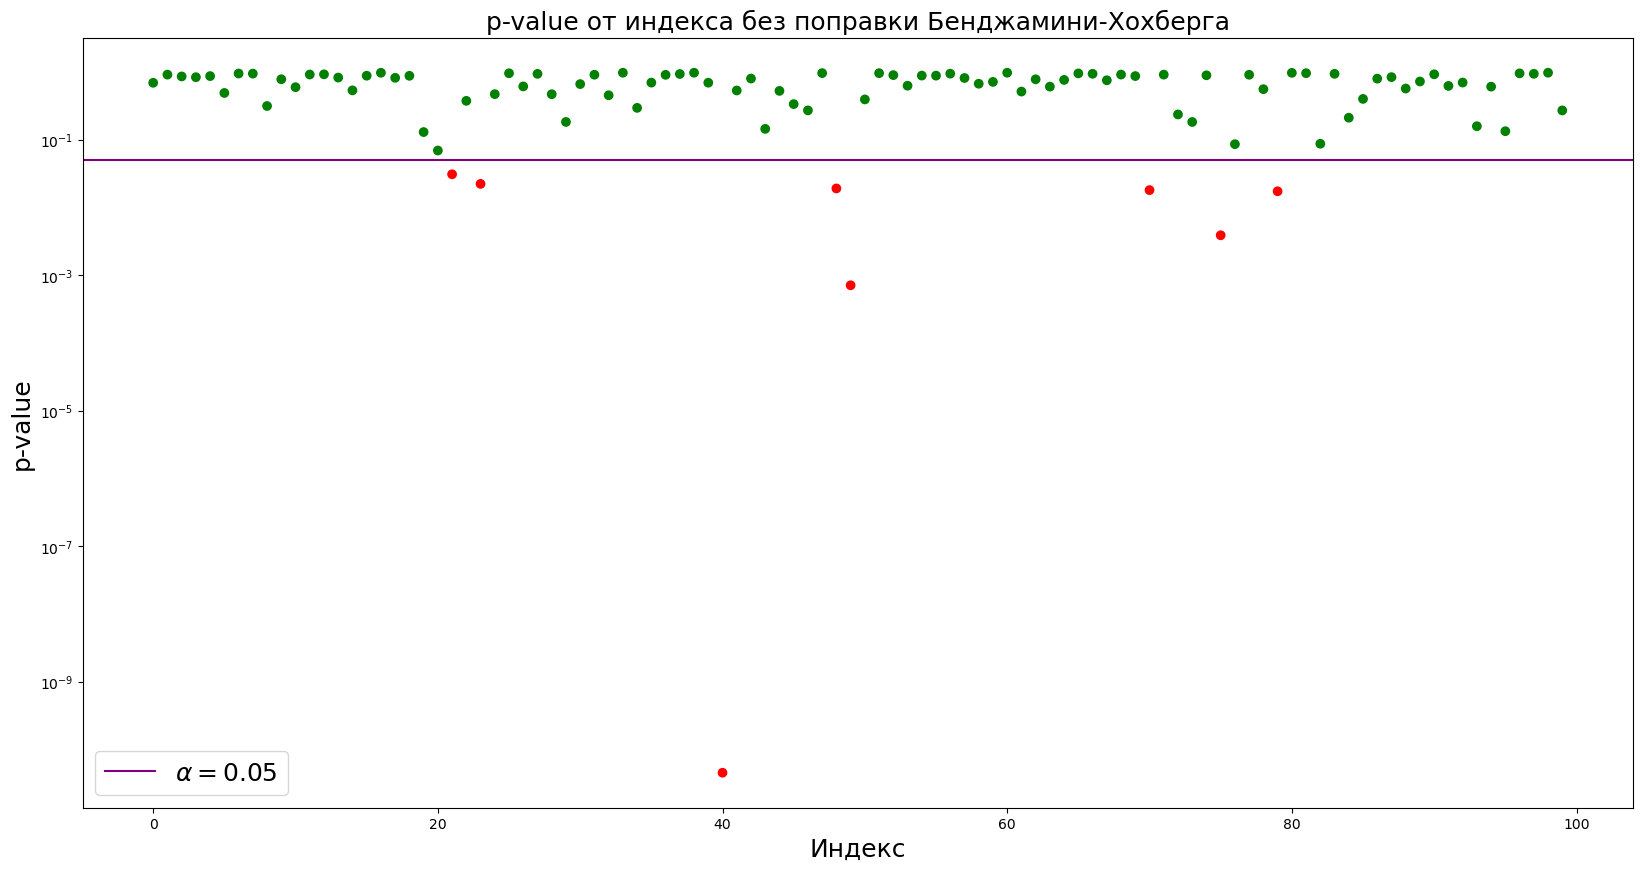

In [127]:
plt.figure(figsize = (20, 10))

colors = ['green' if p_value > 0.05 else 'red' for p_value in p_values]
plt.scatter(range(n), p_values, c=colors)

plt.title("p-value от индекса без поправки Бенджамини-Хохберга", fontsize = 18)
plt.xlabel("Индекс", fontsize = 18)
plt.ylabel("p-value", fontsize = 18)
plt.yscale('log')

plt.axhline(0.05, color='purple', label=r'$\alpha = 0.05$')
plt.legend(fontsize = 18)
plt.show()

In [128]:
def bengamini(p_values):
    Bengamini_p_values = []
    for i in range(len(p_values)):
        Bengamini_p_values.append([p_values[i], i])

    Bengamini_p_values.sort(key = lambda x: x[0])

    Bengamini_p_values[n - 1][0] = min(1, Bengamini_p_values[n - 1][0])

    for i in range(1, n):
        Bengamini_p_values[n - 1 - i][0] = min(1, n / (n - i) * Bengamini_p_values[n - 1 - i][0], 
                                           Bengamini_p_values[n - i][0])

    Bengamini_p_values.sort(key = lambda x: x[1])
    Bengamini_p_values = np.array(Bengamini_p_values).T[0]
    return Bengamini_p_values

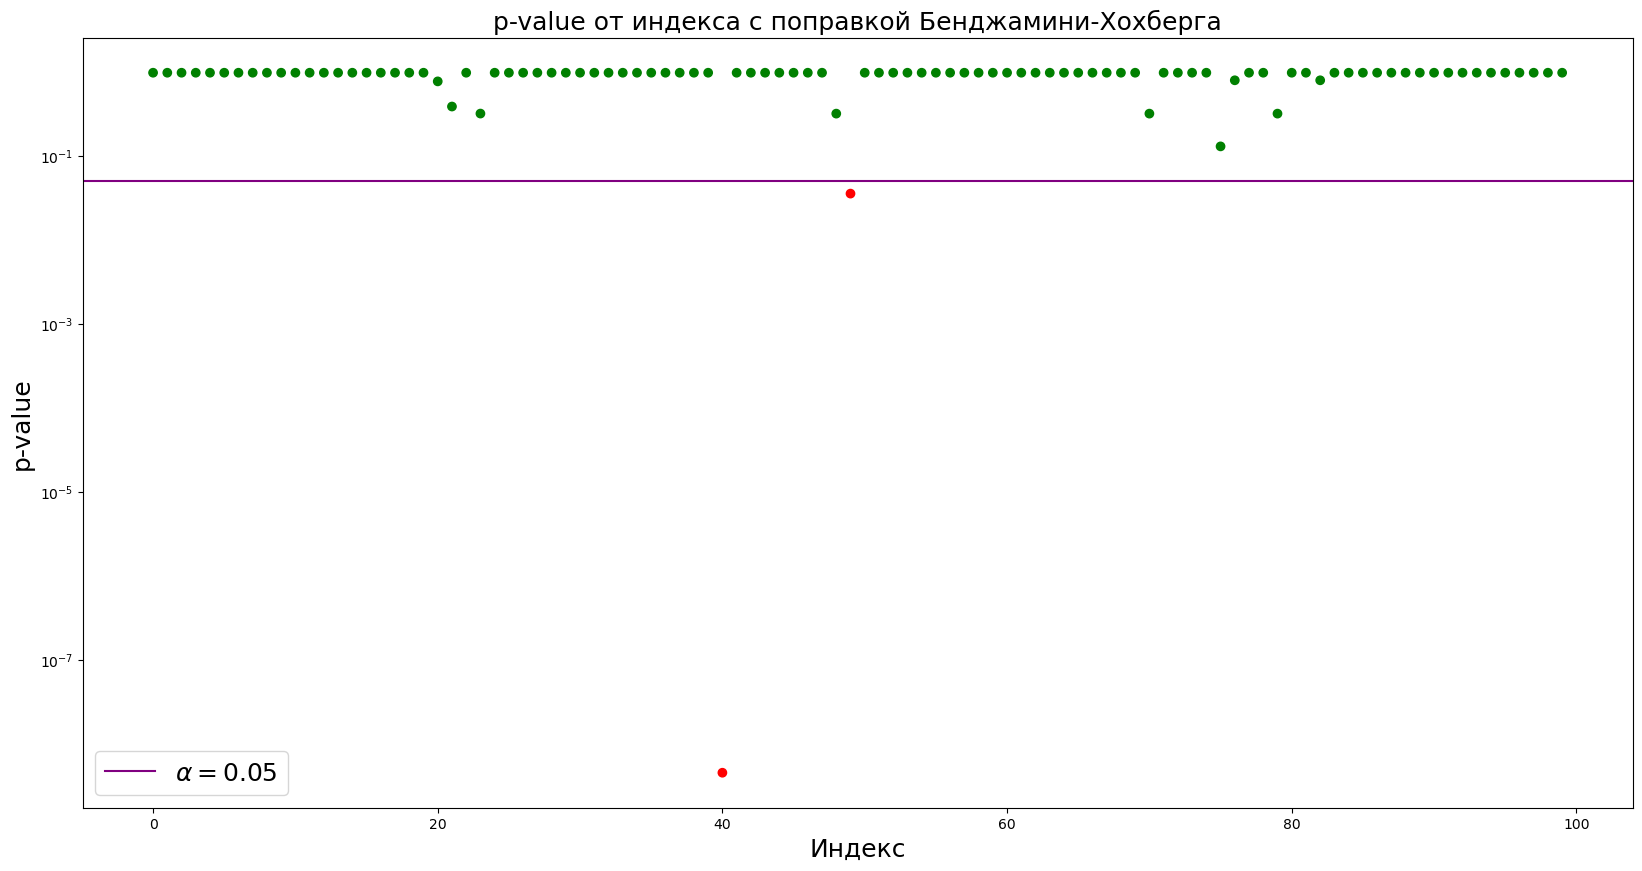

In [129]:
plt.figure(figsize = (20, 10))

colors = ['green' if p_value > 0.05 else 'red' for p_value in bengamini(p_values)]
plt.scatter(range(n), bengamini(p_values), c=colors)

plt.title("p-value от индекса с поправкой Бенджамини-Хохберга", fontsize = 18)
plt.xlabel("Индекс", fontsize = 18)
plt.ylabel("p-value", fontsize = 18)
plt.yscale('log')

plt.axhline(0.05, color='purple', label=r'$\alpha = 0.05$')
plt.legend(fontsize = 18)
plt.show()

Поправка Бенджамини-Хохберга уменьшает количество ложно отклоненных гипотез.

In [174]:
m_0 = 10100
m_1 = 10100
n = 100
np.random.seed(239)

In [177]:
true_positive = []
false_positive = []
for m0 in trange(100, m_0, 500):
    for m1 in range(100, m_1, 500):
        index, X_0, X_1 = prepare_data(m_0=m0, m_1=m1, n=n)
        p_values = statistics(X_0, X_1, m_0=m0, m_1=m1)
        p_values = np.array(p_values)
        if p_values[index] < 0.05:
            true_positive.append(1)
        else:
            true_positive.append(0)
        false_positive_count = -1
        for p_value in p_values:
            if p_value < 0.05:
                false_positive_count += 1
        if p_values[index] < 0.05:
            false_positive_count -= 1
        false_positive.append(false_positive_count)
true_positive = np.array(true_positive)
false_positive = np.array(false_positive)

100%|███████████████████████████████████████████| 20/20 [00:18<00:00,  1.07it/s]


In [178]:
true_positive_bengamini = []
false_positive_bengamini = []
for m0 in trange(100, m_0, 500):
    for m1 in range(100, m_1, 500):
        index, X_0, X_1 = prepare_data(m_0=m0, m_1=m1, n=n)
        p_values = statistics(X_0, X_1, m_0=m0, m_1=m1)
        p_values = bengamini(np.array(p_values))
        if p_values[index] < 0.05:
            true_positive_bengamini.append(1)
        else:
            true_positive_bengamini.append(0)
        false_positive_count = 0
        for p_value in p_values:
            if p_value < 0.05:
                false_positive_count += 1
        if p_values[index] < 0.05:
                false_positive_count -= 1
        false_positive_bengamini.append(false_positive_count)
true_positive_bengamini = np.array(true_positive_bengamini)
false_positive_bengamini = np.array(false_positive_bengamini)

100%|███████████████████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


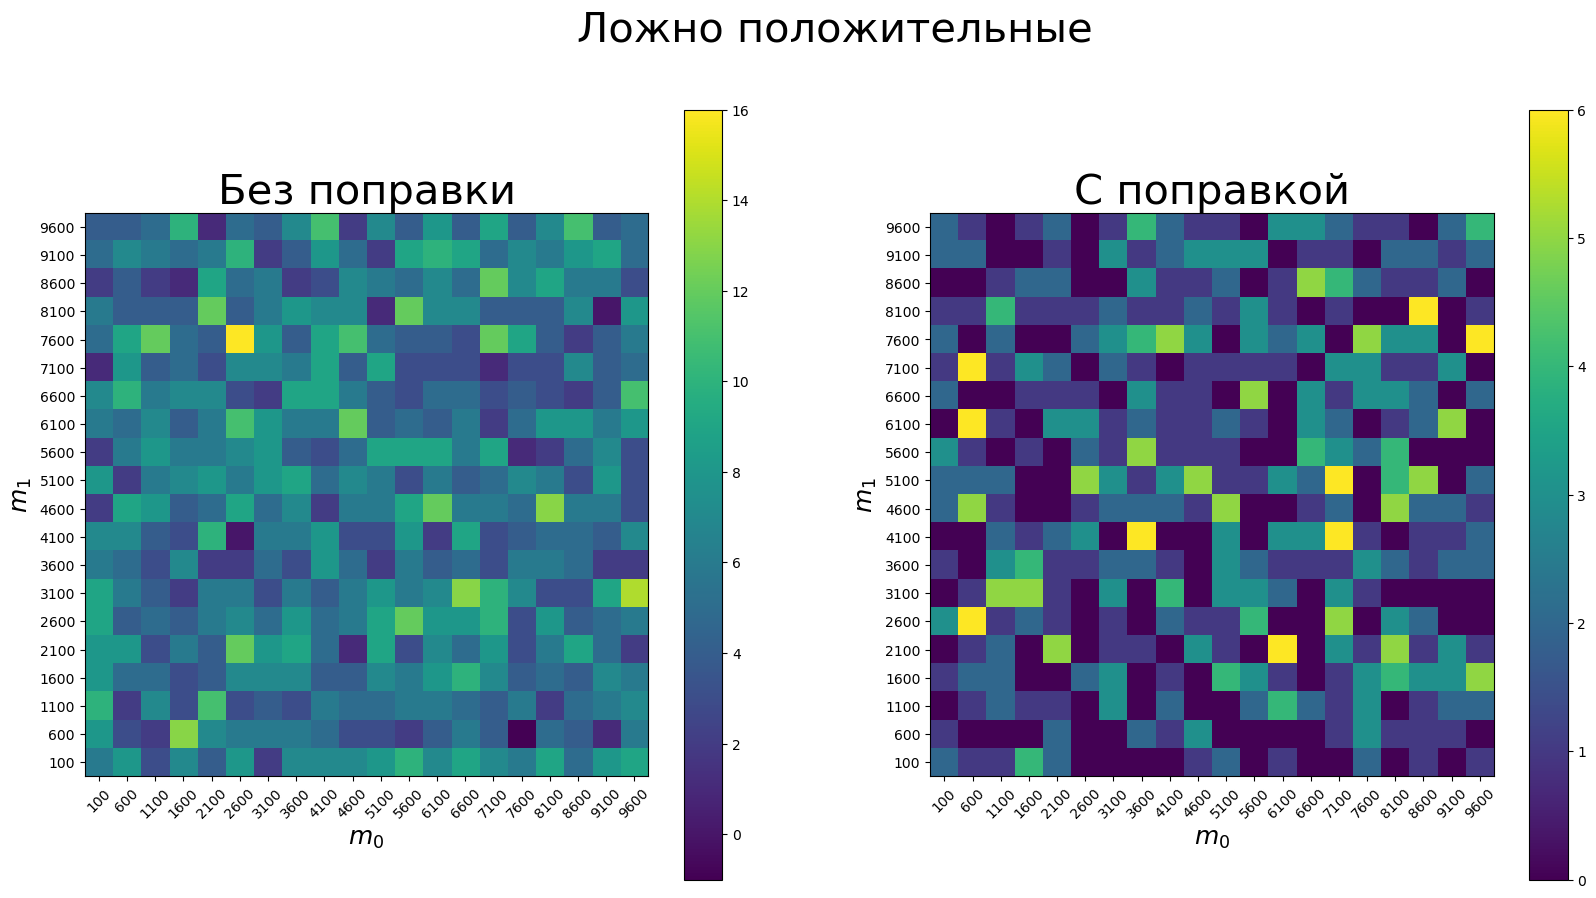

In [187]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.colorbar(plt.imshow(false_positive.reshape((20, 20)), origin='lower'))
plt.title("Без поправки", fontsize=30)
plt.xticks(range(20), range(100, m_0, 500))
plt.tick_params(axis='x', rotation=45)
plt.yticks(range(20), range(100, m_1, 500))
plt.xlabel("$m_0$", fontsize = 18)
plt.ylabel("$m_1$", fontsize = 18)

plt.subplot(1, 2, 2)
plt.colorbar(plt.imshow(false_positive_bengamini.reshape((20, 20)), origin='lower'))
plt.title("С поправкой", fontsize=30)
plt.xticks(range(20), range(100, m_0, 500))
plt.tick_params(axis='x', rotation=45)
plt.yticks(range(20), range(100, m_1, 500))
plt.xlabel("$m_0$", fontsize = 18)
plt.ylabel("$m_1$", fontsize = 18)

plt.suptitle("Ложно положительные", fontsize=30)

plt.show()

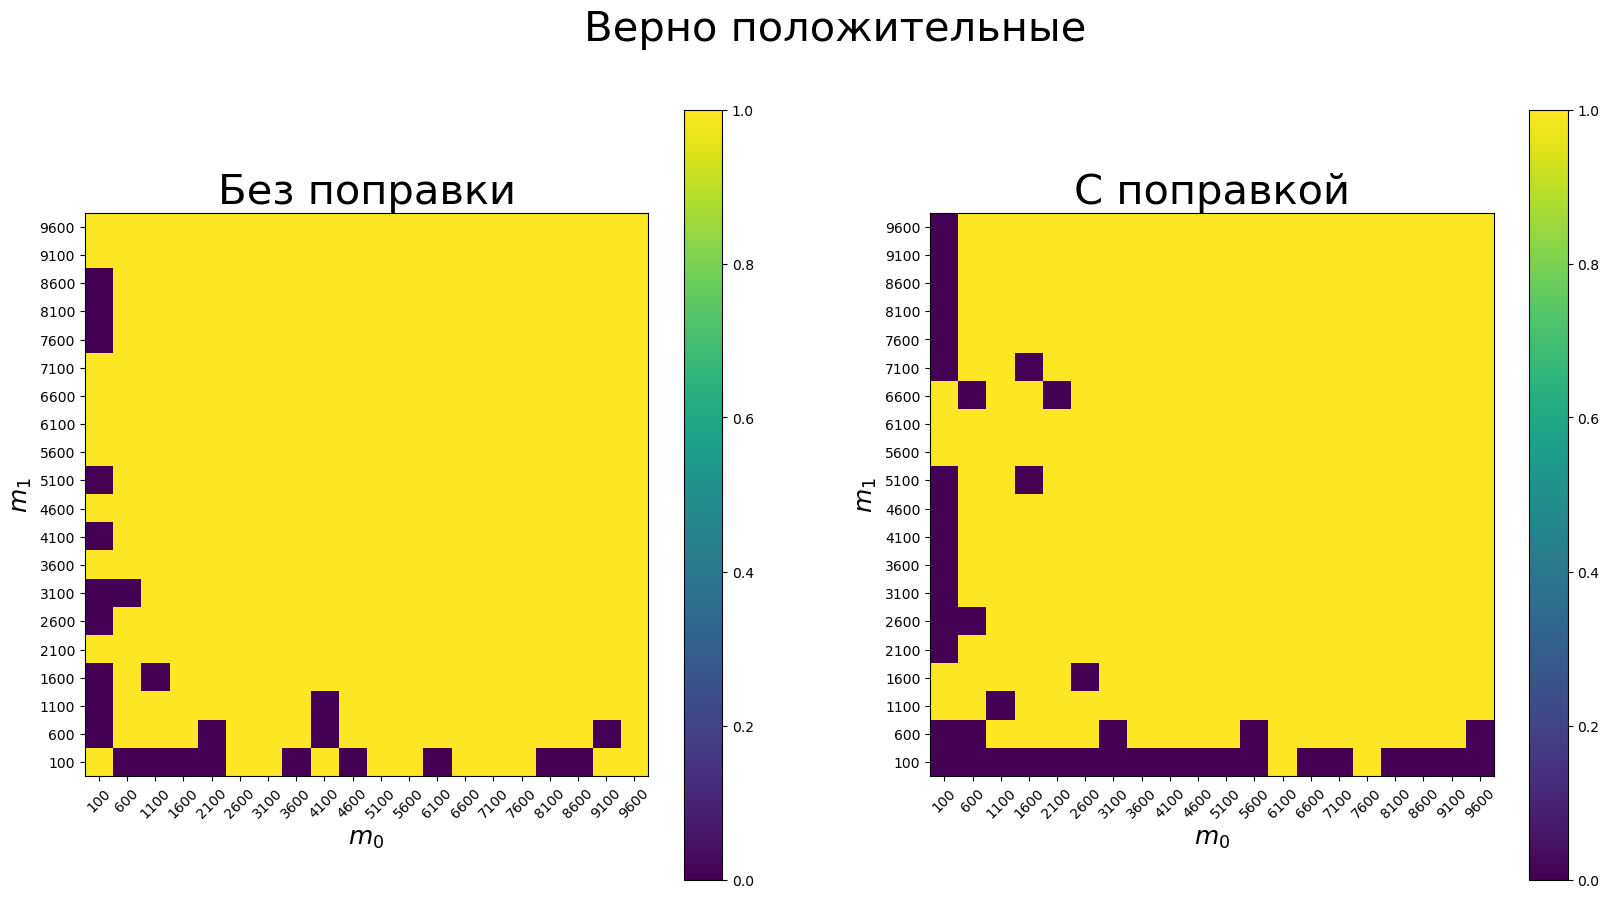

In [189]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.colorbar(plt.imshow(true_positive.reshape((20, 20)), origin='lower'))
plt.title("Без поправки", fontsize=30)
plt.xticks(range(20), range(100, m_0, 500))
plt.tick_params(axis='x', rotation=45)
plt.yticks(range(20), range(100, m_1, 500))
plt.xlabel("$m_0$", fontsize = 18)
plt.ylabel("$m_1$", fontsize = 18)

plt.subplot(1, 2, 2)
plt.colorbar(plt.imshow(true_positive_bengamini.reshape((20, 20)), origin='lower'))
plt.title("С поправкой", fontsize=30)
plt.xticks(range(20), range(100, m_0, 500))
plt.tick_params(axis='x', rotation=45)
plt.yticks(range(20), range(100, m_1, 500))
plt.xlabel("$m_0$", fontsize = 18)
plt.ylabel("$m_1$", fontsize = 18)

plt.suptitle("Верно положительные", fontsize=30)

plt.show()

При увеличении размера выборок без поправки:
1. число верно положительных быстро становится верным;
2. число ложно положительных не зависит и держится на каком-то уровне. 

При увеличении размера выборок с поправкой:
1. исло верно положительных быстро становится верным, но чуть-чуть стало хуже;
2. число ложно положительных не зависит и держится на меньшем уровне.

г) При больших размерах выборок можем все также пользоваться критерием Стьюдента из пункта б), так как в критерии нужна нормальнальность выборочных средних, которая получается из ЦПТ. 

$\textbf{Задача 4 (15 баллов).}$ Пусть имеется матрица признаков $\textbf{X}$ размера $m \times n$.

а) Что такое метод главных компонент? Какую задачу он решает? (3 балла)

б) Описать (доказательно) результат применения (какие будут главные компоненты и соответствующие им собственные числа) метода главных компонент к матрице $\textbf{X}$, если $m > n$, объекты независимы, а $\textbf{x}_j \in N \left( \textbf{0}_n, \sigma^2 I_n \right)$ (4 балла).

в) Пусть $\textbf{X}$ состоит из $n-1$ зашумленной копии некоторого признака $\chi_1$, а также из шкалированного признака $\chi_2$, то есть $\textbf{X} = [\chi_1 + \varepsilon_1, ..., \chi_1 + \varepsilon_{n-1}, \kappa \chi_2]$, где $\chi_1, \chi_2, \varepsilon_1, ..., \varepsilon_{n-1} \sim N (\textbf{0}_m, I_m)$ и независимы в совокупности, а $\kappa > 0$ – коэффициент шкалирования.
Вычислить в зависимости от коэффициента шкалирования κ ожидаемую первую главную компоненту матрицы X, а также ожидаемую долю дисперсии, ею объясняемую, аналитически (5 баллов) и сэмплированием (1 балл). Какой практический вывод можно сделать из полученного результата? (2 балла)

а) Метод главнных компонент − метод снижения размерности данных при потери наименьшего количества информации. 
Метод находит такие направления, вдоль которых дисперсия максимальна и каждое следующее направление ортогонально всем предыдущим. Задача сводится к вычислению собственных значений и собственных векторов ковариационной матрицы.

Существуют различные трактовки постановки задачи метода главнных компонент: 

1. аппроксимировать данные линейными многообразиями меньшей размерности; 
2. найти подпространства меньшей размерности, в ортогональной проекции на которые разброс данных максимален; 
3. найти для данной многомерной случайной величины ортогональное преобразование координат, что в результате корреляции между отдельными координатами обратятся в ноль.

б) Так как признаки независимы и с одинаковой дисперсией, то матрица ковариации: $\Sigma = \sigma^2 I$. Так как матрица диагональная, то все главные компоненты найдены и все собственные числа у этих направлений равны $\sigma^2$ и следовательно все направления равнозначны.

в) Посчитаем компоненты ковариационной матрицы:

$$cov(\chi_1 + \varepsilon_i, \chi_1 + \varepsilon_j) = \mathbb{E}(\chi_1 + \varepsilon_i)(\chi_1 + \varepsilon_j) = \mathbb{E}(\chi_1^2 + \varepsilon_i \varepsilon_j + \chi_1 \varepsilon_i + \chi_1 \varepsilon_j) = 1$$

$$cov(\chi_1 + \varepsilon_i, \chi_1 + \varepsilon_i) = \mathbb{D}(\chi_1 + \varepsilon_i) = \mathbb{D}\chi_1 + \mathbb{D}\varepsilon_i = 2$$

$$cov(\chi_1 + \varepsilon_i, \kappa \chi_2) = \mathbb{E}(\chi_1 + \varepsilon_i) \kappa \chi_2 = \mathbb{E}(\chi_1 + \varepsilon_i) \mathbb{E}\kappa \chi_2 = 0$$

$$cov(\kappa \chi_2, \kappa \chi_2) = \mathbb{D} \kappa \chi_2 = \kappa^2 \mathbb{D} \chi_2 = \kappa^2$$

Таким образом матрица ковариации будет выглядеть:

$$\begin{pmatrix}
      2  &      1 & \cdots &      1 &      0   \\
      1  &      2 & \cdots &      1 &      0   \\
 \vdots  & \vdots & \ddots & \vdots & \vdots   \\
      1  &      1 & \cdots &      2 &      0   \\
      0  &      0 & \cdots &      0 &      k^2 \\
  \end{pmatrix}$$
  
Собственные числа:

1. $\lambda = 1$ крастности $n - 2$;
2. $\lambda = n$ крастности $1$;
3. $\lambda = \kappa^2$ крастности $1$.

Первая главная компонента соответсвует максимальному собственному числу, то есть:
1. Если $\kappa^2 > n$, то собственный вектор -- $(0, \dots,  1)^T$, а доля объясненной дисперсии: $\frac{\kappa^2}{\kappa^2 + 2n - 2}$;
2. Если $\kappa^2 \leq n$, то собственный вектор -- $\frac{1}{\sqrt{n - 1}} (0, \dots,  1)^T$, а доля объясненной дисперсии: $\frac{n}{\kappa^2 + 2n - 2}$.

Вывод: проводя шкалирование признаков, можно менять поведение метода главных компонент.